# dağılım grafikleri

# barplot

In [1]:
#sütun grafikler elimizdeki kategorik değişkenleri görselleştirmek için kullanılıyor.


In [4]:
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [9]:
df["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [10]:
df["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [12]:
#ordinal tanımlama
from pandas.api.types import CategoricalDtype

In [13]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: object

In [16]:
df.cut = df.cut.astype(CategoricalDtype(ordered = True))

In [17]:
df.dtypes

carat       float64
cut        category
color        object
clarity      object
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [18]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): [Fair < Good < Ideal < Premium < Very Good]

In [19]:
cut_kategoriler = ["fair","goood","very good","premium","ideal"]

In [20]:
df_cut = df.cut.astype(CategoricalDtype(categories = cut_kategoriler, ordered = True))

In [26]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): [Fair < Good < Ideal < Premium < Very Good]

# sütun grafiği oluşturma

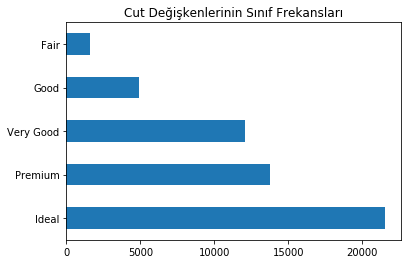

In [37]:
df["cut"].value_counts().plot.barh().set_title("Cut Değişkenlerinin Sınıf Frekansları");

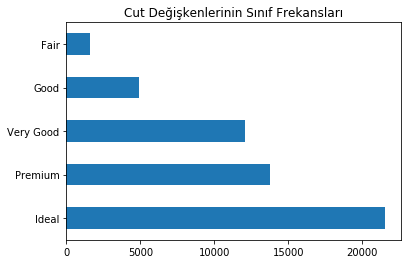

In [38]:
(df["cut"]
 .value_counts()
 .plot.barh()
 .set_title("Cut Değişkenlerinin Sınıf Frekansları"));

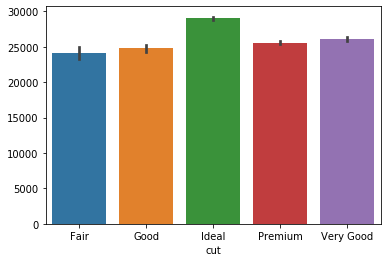

In [40]:
sns.barplot(x = "cut", y = df.cut.index, data = df);

# sütun grafik Çaprazlamalar

In [41]:
# veri seti içerisinde yer alan değişkenlerin birlikte değelendirilmesi demek
# kırılımları göz önünde bulundurmak denebilir
# değişkenlerin etkilerinin birlikte değerlendirilmesi denebilir
# görsel tekniklerinin üzerinde daha somut yorumlar yapabilmeyi sağlayacaktır
# yorumlamalar grafiklerin teknik özelliklerinin yanında veriye değil de daha kapsamlı bilgiye ulaşmak için 
#kullanılacak olan yaklaşımlardır


In [52]:
import seaborn as sns
from pandas.api.types import CategoricalDtype
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
cut_kategoriler = ["Fair","Good","Very Good","Premium","Ideal"]
df.cut = df.cut.astype(CategoricalDtype(categories = cut_kategoriler, ordered = True))
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


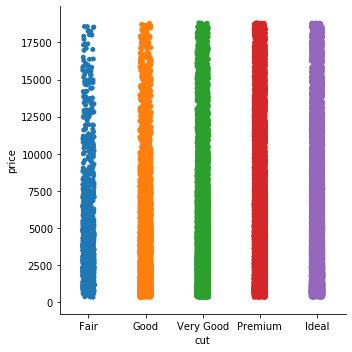

In [55]:
sns.catplot(x = "cut", y = "price", data = df);
# seaborn içerisinden catplot isimli fonk. çağırıyorum
# kategorik değişkenleri görselleştirmek için kullanılan bir fonksiyondur.
# x eksenimize 1.değişkenimize cut kategorik değ. yazıyoruz.
# y eksenine ise price sürekli değişkenimizi yerleştiriyoruz
# ve data mızı df olarak tanımlıyoruz


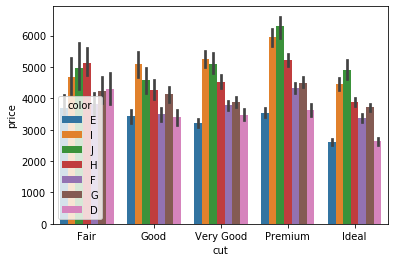

In [56]:
sns.barplot(x = "cut", y = "price", hue = "color", data =  df);

In [57]:
#hue argümanıyla 3.boyut ekledik
# kategorik değ. sadece tek başına değerlendirildiğinde price da meydana getirdiği
# aslında buraya bir boyut daha eklendiğinde (color gibi) ne şekilde farklılaştığı bilgisi
# demek ki burada yapmamız gereken çıkarım;
# elimizdeki değişkenleri görselleştirdiğimizde bu görsellerin üzerine 
# yeni boyutlar, yeni kırılımla,r yeni değişkenler ekledikçe oluşturmuş olduğumuz grafiklerin bize sunmuş olduğu 
# ilk bilginin nasıl ortaya çıkmış olduğunu görmüş olduk
#daha fazla açıklanabilirlik elde ettik önemli bir kavram
#doğru bilgiye doğru şekilde ulaşmak...
# burada sadece bir değişkeni tek başına görselleştşşrmenimn yeterli olmadığı bilgisine erişiyoruz


In [58]:
# veri görselleştirmede amaç büyük resime erişmekkk!
# seaborn yüksek seviye bir kütüphane olduğundan fonk.lar dizisi olduğundan 3.boyut eklediğimizde
# bunu teknik olarak bir arada göstermek sütun grafiği anlamında çok mümkün olmayacağından dolayı
# arka tarafta aslında kendisi bir veriyi temsil etme değeri oluşturup bir merkezi eğilimleri
#temsil edecek bir kategorik değişkenler kırılımı oluşturup buna göre bir yansıtma yaptı


In [59]:
#şimdiiii;
#doğrulama işlemleri
# ulaşmış olduğumuz değerler üzerinde büyük aksiyonlar alınırsa ;


In [60]:
df.groupby(["cut","color"])["price"].mean()

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Ideal      D        2629.094566
           E        2597.550090
           F        337

In [ ]:
# elimizde bir veri var verim bilimci ve veri analisti olarak veriyi çok iyi tanımamız lazım 
# çok iyi şekilde tanıma işlemi içinn hangi grafik tekniğinin hangi değişkenler ile oluşturulabilceği
#bu grafikleri oluşturuken çaprazlama işlemleri ve yorumlama teknikleri olacak